In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For parametric fitting
from scipy import optimize
from sklearn.metrics import mean_absolute_error
pd.plotting.register_matplotlib_converters()

from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels as sm

In [99]:
world = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')

In [100]:
sweden = world[world['Country/Region'].isin(['Sweden'])]
sweden = sweden.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [106]:
# Change format from wide to long for plotting
sweden_long = pd.melt(sweden, id_vars=['Country/Region'] ,var_name='ds', value_name='y')
# Change data column for time series
sweden_long['ds'] = pd.to_datetime(sweden_long['ds'],  infer_datetime_format=True)


In [107]:
sweden_long

,Country/Region,ds,y
0,Sweden,2020-01-22,0
1,Sweden,2020-01-23,0
2,Sweden,2020-01-24,0
3,Sweden,2020-01-25,0
4,Sweden,2020-01-26,0
...,...,...,...
105,Sweden,2020-05-06,23918
106,Sweden,2020-05-07,24623
107,Sweden,2020-05-08,25265
108,Sweden,2020-05-09,25921


/home/paulina/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



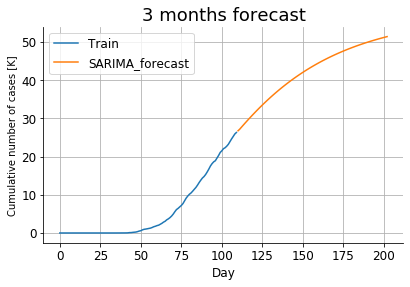

In [206]:
y_hat_avg = test.copy()
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
fit1 = sm.tsa.statespace.sarimax.SARIMAX(sweden_long.y, order=(2, 1, 4)).fit()
plt.plot(sweden_long['y'], label='Train')
plt.plot(fit1.forecast(93), label='SARIMA_forecast')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: f'{int(x*1e-3)}'))
plt.xlabel('Day', fontsize=12)
plt.ylabel('Cumulative number of cases [K]', fontsize=10)
plt.title('3 months forecast', fontsize=18)
plt.legend(loc='best', prop={'size': 12})
plt.grid()
plt.show()
fig.savefig('../figures/prognosis_cumulative.png', bbox_inches='tight', dpi=300)


In [122]:
# sweden_deaths = pd.read_excel('../data/Folkhalsomyndigheten_Covid19.xlsx', 'Antal avlidna per dag')
# sweden_deaths  = sweden_deaths.rename(columns={'Datum_avliden': 'ds', 'Antal_avlidna': 'y'})
# sweden_deaths = sweden_deaths.iloc[0:-1].reset_index()

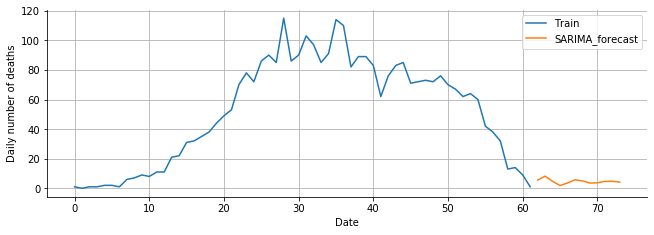

In [133]:
# y_hat_avg = test.copy()
# fig = plt.figure(figsize=(8.33, 2.6))
# ax = fig.add_axes([0, 0, 1, 1])
# fit1 = sm.tsa.statespace.sarimax.SARIMAX(sweden_deaths.y, order=(2, 1, 4)).fit()
# plt.plot(sweden_deaths['y'], label='Train')
# plt.plot(fit1.forecast(12), label='SARIMA_forecast')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.xlabel('Date')
# plt.ylabel('Daily number of deaths')
# plt.legend(loc='best')
# plt.grid()
# plt.show()
# fig.savefig('../figures/prognosis_sarima.png', bbox_inches='tight')


In [137]:
sweden_cases = pd.read_excel('../data/Folkhalsomyndigheten_Covid19.xlsx', 'Antal per dag region')
sweden_cases = sweden_cases.iloc[:, 0:2]
sweden_cases  = sweden_cases.rename(columns={'Statistikdatum': 'ds', 'Totalt_antal_fall': 'y'})

/home/paulina/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



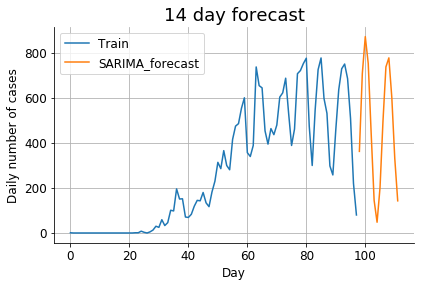

In [186]:
y_hat_avg = test.copy()
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
fit1 = sm.tsa.statespace.sarimax.SARIMAX(sweden_cases.y, order=(2, 1, 4)).fit()
plt.plot(sweden_cases['y'], label='Train')
plt.plot(fit1.forecast(14), label='SARIMA_forecast')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Daily number of cases', fontsize=12)
plt.title('14 day forecast', fontsize=18)
# plt.suptitle('Daily number of cases', fontsize=18)
plt.legend(loc='best', prop={'size': 12})
plt.grid()
plt.show()
fig.savefig('../figures/prognosis_daily.png', bbox_inches='tight', dpi=300)


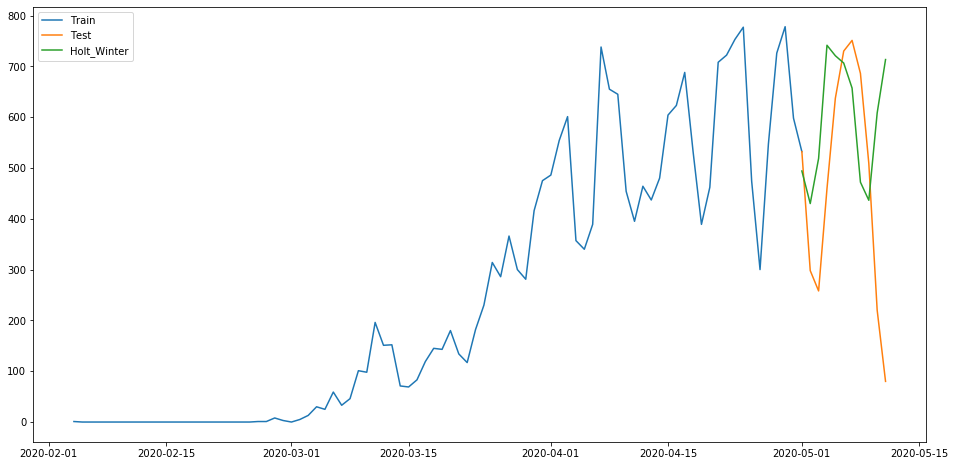

In [256]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=14, trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['y'], label='Train')
plt.plot(test['y'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
# plt.plot(fit1.forecast(33), label='HoltWinter_forecast')
plt.legend(loc='best')
plt.show()

In [254]:
fit1.forecast(14)

array([494.04384084, 429.9293902 , 518.74555585, 741.46403616,
       720.85073135, 706.48424028, 657.171755  , 471.98165426,
       436.39430963, 608.16678715, 713.3304775 , 750.49138259,
       659.40241849, 748.05672436])

In [221]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.y, y_hat_avg['Holt_Winter']))
print(rms)

267.28674987738054


In [131]:
sweden_deaths = sweden_deaths.iloc[:-1, :]
sweden_deaths = sweden_deaths.rename(columns={'Datum_avliden': 'ds', 'Antal_avlidna': 'y'})
# sweden_deaths['ds'] = sweden_deaths['ds'].astype('datetime64[ns]')

In [111]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

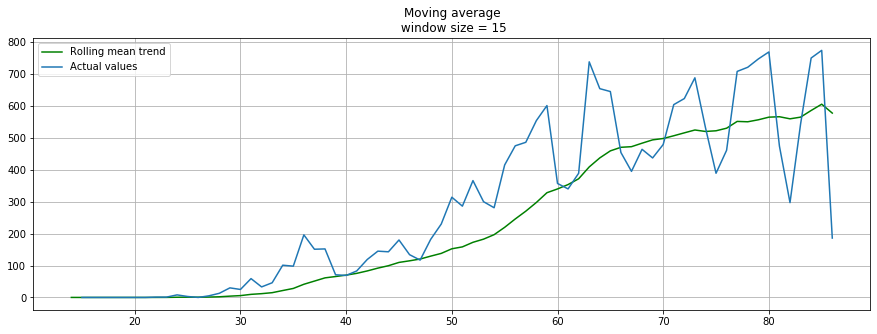

In [112]:
plotMovingAverage(sweden_cases.y, 15) # 15 day trend


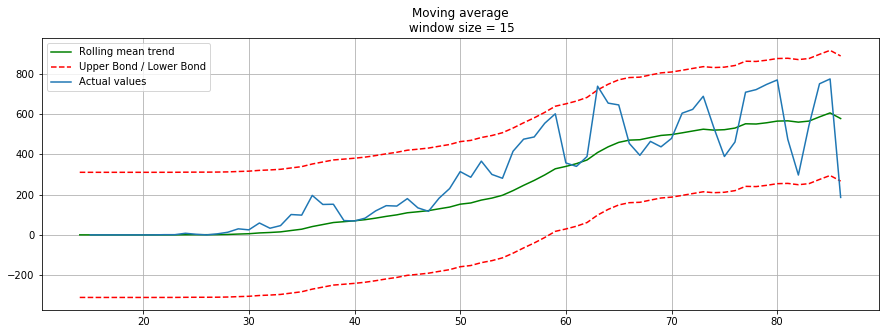

In [113]:
plotMovingAverage(sweden_cases.y, 15, plot_intervals=True) # 15 day trend
